In [1]:
"""
1 - analisar o panorama geral - CHECK
2 - obter os dados - CHECK
3 - identificar e visualizar os dados para obter informações úteis - CHECK
4 - preparar os dados para os algoritmos de aprendizado de dados - CHECK
5 - selecionar e treinar o modelo - CHECK
6 - aperfeiçoar o modelo - CHECK
7 - apresentar a solução - CHECK
8 - colocar em produção -
"""

'\n1 - analisar o panorama geral - CHECK\n2 - obter os dados - CHECK\n3 - identificar e visualizar os dados para obter informações úteis - CHECK\n4 - preparar os dados para os algoritmos de aprendizado de dados - CHECK\n5 - selecionar e treinar o modelo - CHECK\n6 - aperfeiçoar o modelo - CHECK\n7 - apresentar a solução - CHECK\n8 - colocar em produção -\n'

In [2]:
"""
BHK: Number of Bedrooms, Hall, Kitchen.
Rent: Rent of the Houses/Apartments/Flats.
Size: Size of the Houses/Apartments/Flats in Square Feet.
Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
Area Locality: Locality of the Houses/Apartments/Flats.
City: City where the Houses/Apartments/Flats are Located.
Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
Bathroom: Number of Bathrooms.
Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

"""

'\nBHK: Number of Bedrooms, Hall, Kitchen.\nRent: Rent of the Houses/Apartments/Flats.\nSize: Size of the Houses/Apartments/Flats in Square Feet.\nFloor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)\nArea Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.\nArea Locality: Locality of the Houses/Apartments/Flats.\nCity: City where the Houses/Apartments/Flats are Located.\nFurnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.\nTenant Preferred: Type of Tenant Preferred by the Owner or Agent.\nBathroom: Number of Bathrooms.\nPoint of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.\n\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#reading the dataset

data_df = pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
data_df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
def statistical_analysis(column_name:str):
    """
    column_name: name of some column of dataframe to find the average, min and max values.
    No values to return.
    """
    
    sum_rent_per_column = dict()
    residences_per_column = dict()
    max_values_per_column = dict()
    min_values_per_column = dict()
    
    for unique_element in data_df[column_name].unique():
        sum_rent_per_column[unique_element] = 0
        residences_per_column[unique_element] = 0
        max_values_per_column[unique_element] = 0
        min_values_per_column[unique_element] = 9999999
    
    for element, rent in zip(data_df[column_name], data_df['Rent']):
        residences_per_column[element] += 1
        sum_rent_per_column[element] += rent

        if max_values_per_column[element] < rent:
            max_values_per_column[element] = rent

        if min_values_per_column[element] > rent:
            min_values_per_column[element] = rent

    for city in sum_rent_per_column:
        print(f"Average price from {city}: {sum_rent_per_column[city]//residences_per_column[city]}")
        print(f"Minimun price from {city}: {min_values_per_column[city]}")
        print(f"Maximum price from {city}: {max_values_per_column[city]}")
        print()

        
def plot_comparison_bar(column_name:str, rescale_indice:float=1):
    """
    column_name: name of some column of dataframe to find to plot a comparison with rent.
    rescale_indice: float number to multiply any element from the column to make it easier to see on plot.
    No values to return.
    """ 
    if rescale_indice != 0:
        x_values = data_df[column_name]*rescale_indice
    else:
        x_values = data_df[column_name]
    
    plt.xlabel(column_name)
    plt.ylabel('Rent')
    plt.bar(x_values, data_df['Rent'])
    

def plot_distribution_categories(column_name:str):
    """
    column_name: name of some column of dataframe to find to plot distribution porcentage with pie graph.
    No values to return.
    """
    elements_per_category = dict()
        
    for unique_element in data_df[column_name].unique():
        elements_per_category[unique_element] = 0
    
    for element in data_df[column_name]:
        elements_per_category[element] += 1
    
    percents = np.array(list(elements_per_category.values()))/len(data_df.index)
    plt.pie(list(elements_per_category.values()), percents, labels = list(elements_per_category.keys()), autopct="%1.1f%%")

In [6]:
def plot_distribution_categories(column_name:str):
    """
    Plotting with an pie graph the distribution of data from column 'column_name'.
    This function don't have any return.
    """
    elements_per_category = dict()
        
    for unique_element in data_df[column_name].unique():
        elements_per_category[unique_element] = 0
    
    for element in data_df[column_name]:
        elements_per_category[element] += 1
    
    percents = np.array(list(elements_per_category.values()))/len(data_df.index)
    plt.pie(list(elements_per_category.values()), percents, labels = list(elements_per_category.keys()))

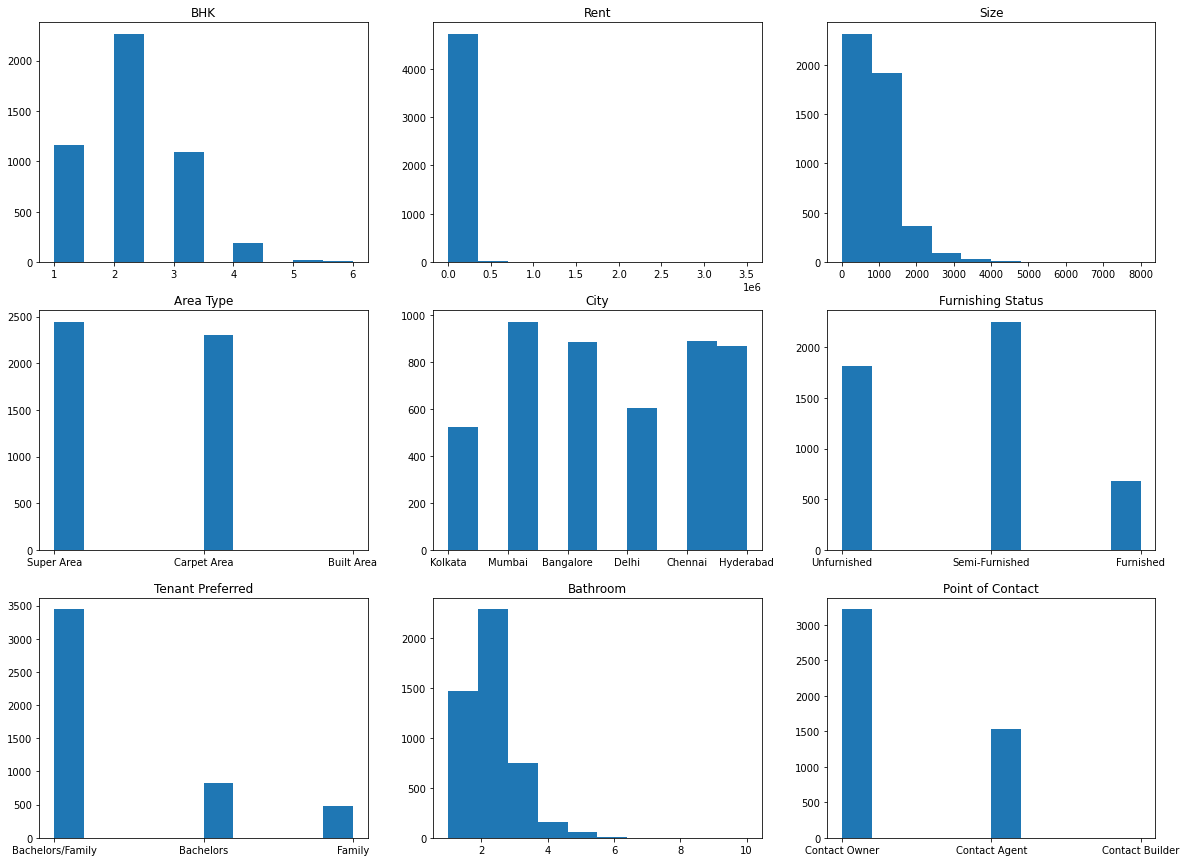

In [7]:
#Plotting the histogram of the dataset information. The "Posted On", "Floor" and "Area Locality" 
#features have been left out because they have too many values for histogram visualization.

plt.figure(figsize=(20, 15))

i = 0
for feature in data_df.columns:
    if feature not in ["Posted On", "Floor", "Area Locality"]:
        i += 1
        plt.subplot(3, 3, i)
        plt.hist(data_df[feature])
        plt.title(feature)

In [8]:
#Basic information about data 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [9]:
#Basic statistical of numerical data
data_df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [10]:
#All possible values for each of the columns

for feature in data_df.columns:
    possibilities_of_values = len(set(data_df[feature].tolist()))
    print(f'"{feature}" has {possibilities_of_values} possible values')

"Posted On" has 81 possible values
"BHK" has 6 possible values
"Rent" has 243 possible values
"Size" has 615 possible values
"Floor" has 480 possible values
"Area Type" has 3 possible values
"Area Locality" has 2235 possible values
"City" has 6 possible values
"Furnishing Status" has 3 possible values
"Tenant Preferred" has 3 possible values
"Bathroom" has 8 possible values
"Point of Contact" has 3 possible values


Average price from Kolkata: 11645
Minimun price from Kolkata: 1500
Maximum price from Kolkata: 180000

Average price from Mumbai: 85321
Minimun price from Mumbai: 4500
Maximum price from Mumbai: 1200000

Average price from Bangalore: 24966
Minimun price from Bangalore: 3500
Maximum price from Bangalore: 3500000

Average price from Delhi: 29461
Minimun price from Delhi: 2000
Maximum price from Delhi: 530000

Average price from Chennai: 21614
Minimun price from Chennai: 3000
Maximum price from Chennai: 600000

Average price from Hyderabad: 20555
Minimun price from Hyderabad: 1200
Maximum price from Hyderabad: 400000



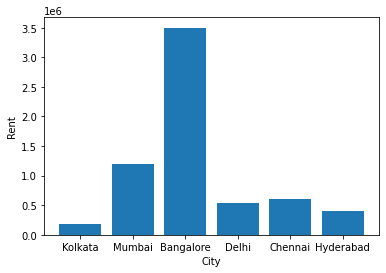

In [11]:
#How does rents be distributed in relation to cities?

statistical_analysis("City")
plot_comparison_bar("City")

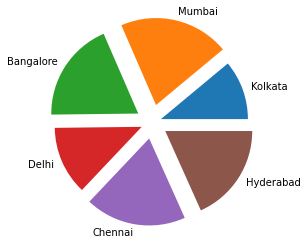

In [12]:
plot_distribution_categories("City")

In [13]:
"""
Analysis: even though the distribution of rents by city is much more pronounced in Bangalore, the most expensive city on average is Mumbai, in contrast,
Kolkata is the cheapest and with the smallest distribution. In addition, all cities have very high minimum and maximum values.
"""

'\nAnalysis: even though the distribution of rents by city is much more pronounced in Bangalore, the most expensive city on average is Mumbai, in contrast,\nKolkata is the cheapest and with the smallest distribution. In addition, all cities have very high minimum and maximum values.\n'

Average price from 2: 22113
Minimun price from 2: 2000
Maximum price from 2: 600000

Average price from 1: 14139
Minimun price from 1: 1500
Maximum price from 1: 200000

Average price from 3: 55863
Minimun price from 3: 1200
Maximum price from 3: 3500000

Average price from 6: 73125
Minimun price from 6: 20000
Maximum price from 6: 280000

Average price from 4: 168864
Minimun price from 4: 10000
Maximum price from 4: 1200000

Average price from 5: 297500
Minimun price from 5: 22500
Maximum price from 5: 650000



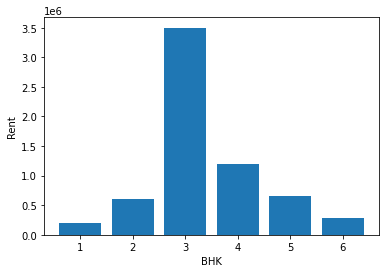

In [14]:
#How does rents be distributed in relation to BHK(bathrooms, halls, kitchen)?

statistical_analysis('BHK')
plot_comparison_bar('BHK')

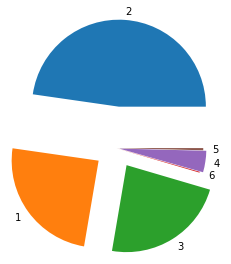

In [15]:
plot_distribution_categories("BHK")

In [16]:
"""
Analysis: The values are well distributed, but there is outlier. They must be removed or joined together before the model is constructed
"""

'\nAnalysis: The values are well distributed, but there is outlier. They must be removed or joined together before the model is constructed\n'

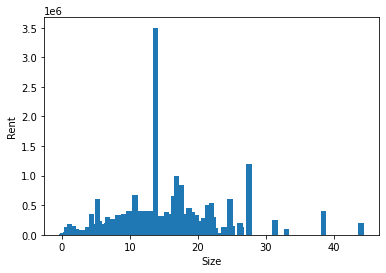

In [17]:
#How does rents be distributed in relation to size?
#statistical_analysis('Size') a lot possibles!
plot_comparison_bar('Size', 0.0055)

In [18]:
"""
Because there are some values far away from the set (the leftmost of the chart) 
and some very large near 270 (or 15 in the chart), there is posibly "outliers" data that should be removed
"""

'\nBecause there are some values far away from the set (the leftmost of the chart) \nand some very large near 270 (or 15 in the chart), there is posibly "outliers" data that should be removed\n'

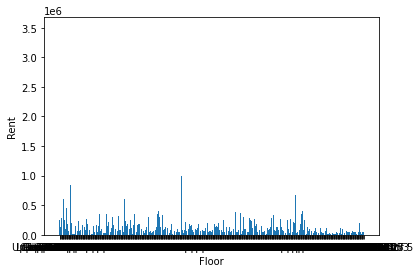

In [19]:
#How does rents be distributed in relation to floor?

#statistical_analysis() a lot possibles!
plot_comparison_bar('Floor')

In [20]:
#Possible values to floor:
print(set(data_df['Floor'].tolist()))

{'19 out of 30', '17 out of 18', '18 out of 25', '60 out of 77', '25 out of 32', 'Ground out of 5', '2 out of 8', '41 out of 41', '7 out of 23', '9 out of 12', '11 out of 16', '10 out of 23', '17 out of 42', '11 out of 28', '1 out of 12', '15 out of 17', '2 out of 16', '11 out of 22', '6 out of 13', '9 out of 18', '11 out of 21', '21 out of 21', '6 out of 29', '6 out of 30', '14 out of 21', '7 out of 7', '5 out of 13', '7 out of 30', '15 out of 28', '16 out of 36', '3 out of 5', '9 out of 15', '13 out of 16', '3 out of 22', '10 out of 19', '15 out of 31', '8 out of 32', '5 out of 19', '11 out of 13', '22 out of 52', '5 out of 15', '7 out of 12', 'Upper Basement out of 20', '7 out of 10', '27 out of 58', '9 out of 20', '10 out of 12', 'Ground out of 3', 'Upper Basement out of 16', '26 out of 44', '17 out of 22', '13 out of 23', '8 out of 5', '11 out of 17', '9 out of 11', '60 out of 71', '8 out of 45', '12 out of 16', '32 out of 59', '6 out of 16', '3 out of 8', '10 out of 18', '34 out 

In [21]:
"""
Considering the absurd amount of possibilities, it is very difficult to find a pattern, so it will be necessary modifications in this data, first to turn it into numeric, 
and second, to reduce the amount of possibilities of the data to find easier algorithm to find patterns.
"""

'\nConsidering the absurd amount of possibilities, it is very difficult to find a pattern, so it will be necessary modifications in this data, first to turn it into numeric, \nand second, to reduce the amount of possibilities of the data to find easier algorithm to find patterns.\n'

Average price from Super Area: 18673
Minimun price from Super Area: 1500
Maximum price from Super Area: 350000

Average price from Carpet Area: 52385
Minimun price from Carpet Area: 1200
Maximum price from Carpet Area: 3500000

Average price from Built Area: 10500
Minimun price from Built Area: 6000
Maximum price from Built Area: 15000



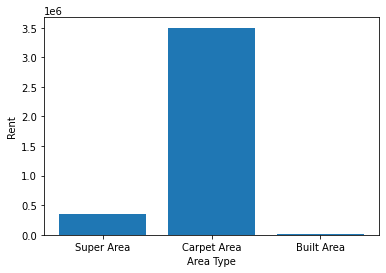

In [22]:
statistical_analysis('Area Type')
plot_comparison_bar('Area Type')

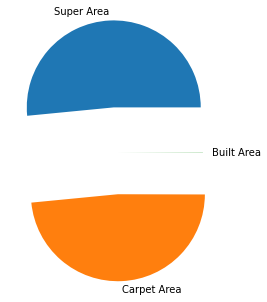

In [23]:
plot_distribution_categories("Area Type")

In [24]:
"""
Analysis: 
    There is a large concentration of properties with "Carpet Area", but there are no explanations about how this directly affects the calculation for 
the variable "size", so the data with "Built Area" (which almost does not appear in the dataset) will be excluded and the two remaining values will be used 
as categorical values.
"""

'\nAnalysis: \n    There is a large concentration of properties with "Carpet Area", but there are no explanations about how this directly affects the calculation for \nthe variable "size", so the data with "Built Area" (which almost does not appear in the dataset) will be excluded and the two remaining values will be used \nas categorical values.\n'

Average price from Unfurnished: 22461
Minimun price from Unfurnished: 2000
Maximum price from Unfurnished: 600000

Average price from Semi-Furnished: 38718
Minimun price from Semi-Furnished: 1500
Maximum price from Semi-Furnished: 3500000

Average price from Furnished: 56110
Minimun price from Furnished: 1200
Maximum price from Furnished: 850000



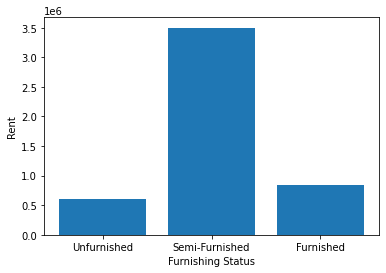

In [25]:
statistical_analysis('Furnishing Status')
plot_comparison_bar('Furnishing Status')

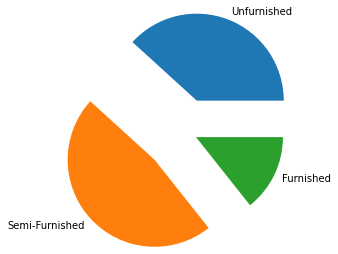

In [26]:
plot_distribution_categories("Furnishing Status")

In [27]:
"""
Analysis:
    Houses with furniture are valued, but are not so common. Possibly the semi furnished houses are of low quality or are disposable things.
"""

'\nAnalysis:\n    Houses with furniture are valued, but are not so common. Possibly the semi furnished houses are of low quality or are disposable things.\n'

Average price from Bachelors/Family: 31210
Minimun price from Bachelors/Family: 1200
Maximum price from Bachelors/Family: 1200000

Average price from Bachelors: 42143
Minimun price from Bachelors: 3500
Maximum price from Bachelors: 3500000

Average price from Family: 50020
Minimun price from Family: 5000
Maximum price from Family: 1000000



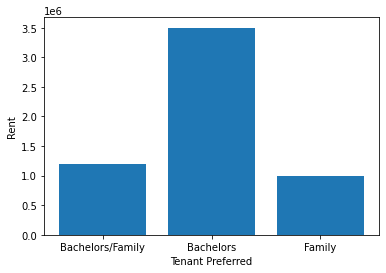

In [28]:
statistical_analysis('Tenant Preferred')
plot_comparison_bar('Tenant Preferred')

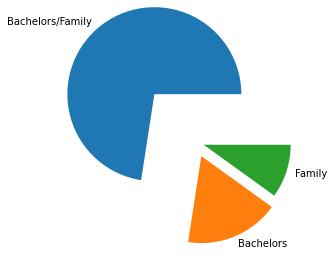

In [29]:
plot_distribution_categories("Tenant Preferred")

In [30]:
"""
Analysis: 
    Houses in which public will rent are cheaper, while homes where there is preference for families are priced higher.
"""

'\nAnalysis: \n    Houses in which public will rent are cheaper, while homes where there is preference for families are priced higher.\n'

Average price from 2: 25043
Minimun price from 2: 3200
Maximum price from 2: 600000

Average price from 1: 11862
Minimun price from 1: 1500
Maximum price from 1: 100000

Average price from 3: 63176
Minimun price from 3: 1200
Maximum price from 3: 3500000

Average price from 5: 252350
Minimun price from 5: 27000
Maximum price from 5: 680000

Average price from 4: 167846
Minimun price from 4: 15000
Maximum price from 4: 1200000

Average price from 6: 177500
Minimun price from 6: 20000
Maximum price from 6: 400000

Average price from 7: 81666
Minimun price from 7: 35000
Maximum price from 7: 150000

Average price from 10: 200000
Minimun price from 10: 200000
Maximum price from 10: 200000



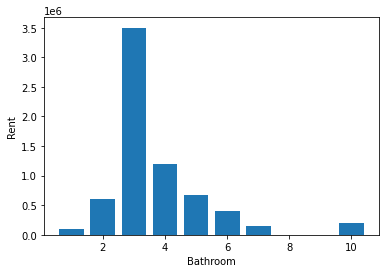

In [31]:
statistical_analysis('Bathroom')
plot_comparison_bar('Bathroom')

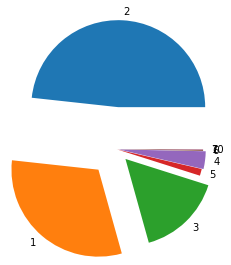

In [32]:
plot_distribution_categories("Bathroom")

In [33]:
"""
#Analysis:
    Locations with 10 bathrooms are outliers. Perhaps the data is a little inaccurate for very low 
(1 or 2) or very high (more than 5) values. You may want to change them to be used in the algorithm.
"""

'\n#Analysis:\n    Locations with 10 bathrooms are outliers. Perhaps the data is a little inaccurate for very low \n(1 or 2) or very high (more than 5) values. You may want to change them to be used in the algorithm.\n'

Average price from Contact Owner: 16704
Minimun price from Contact Owner: 1200
Maximum price from Contact Owner: 600000

Average price from Contact Agent: 73481
Minimun price from Contact Agent: 5000
Maximum price from Contact Agent: 3500000

Average price from Contact Builder: 5500
Minimun price from Contact Builder: 5500
Maximum price from Contact Builder: 5500



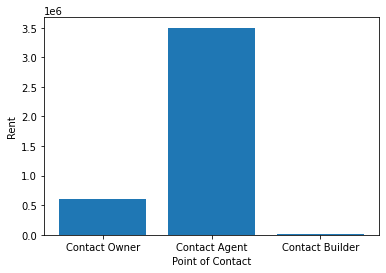

In [34]:
statistical_analysis('Point of Contact')
plot_comparison_bar('Point of Contact')

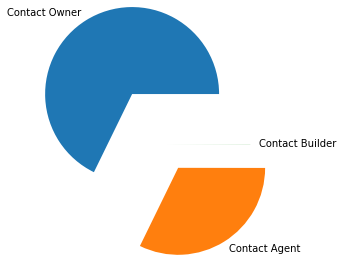

In [35]:
plot_distribution_categories("Point of Contact")

In [36]:
"""
#Analysis:
    The choice of contracting is very relevant to the value of the property. In addition, features with "Contact Builder" are unusual and should be removed.
"""

'\n#Analysis:\n    The choice of contracting is very relevant to the value of the property. In addition, features with "Contact Builder" are unusual and should be removed.\n'

In [37]:
data_df['Rent'].unique().tolist()

"""
Analysis:
    Probably the highest values may be wrong, possibly registry error, and will be taken from the dataset.
"""

'\nAnalysis:\n    Probably the highest values may be wrong, possibly registry error, and will be taken from the dataset.\n'

In [38]:
#Creating filters for outliers.

#BHK:
filter_BHK = data_df['BHK'] < 8
data_df = data_df[filter_BHK]

#Posted On and Posted On
data_df = data_df.drop(columns=["Posted On", "Area Locality"])

#Area Type
filter_area_type = data_df['Area Type'] != "Built Area"
data_df = data_df[filter_area_type]

#Size
filter_size = data_df['Size'] < 4000
data_df = data_df[filter_size]

#Bathroom
filter_bathroom = data_df['Bathroom'] < 6
data_df = data_df[filter_bathroom]

#Point of Contact
filter_point_of_contact = data_df['Point of Contact'] != 'Contact Builder'
data_df = data_df[filter_point_of_contact]

#Rent
filter_rent = data_df['Rent'] < 500_000
data_df = data_df[filter_rent]

In [39]:
#Changing the values of the "Floor" column

"""
< 5: 1
< 10: 2
< 20: 3
< 30: 4
> 30: 5
"""
filter_floor = data_df['Floor'] != "Ground"
data_df = data_df[filter_floor]

filter_floor = data_df['Floor'] != "1"
data_df = data_df[filter_floor]

filter_floor = data_df['Floor'] != "2"
data_df = data_df[filter_floor]

filter_floor = data_df['Floor'] != "3"
data_df = data_df[filter_floor]

new_elements_for_floor = []

for floor in data_df["Floor"]:
    if floor[-2] == " ": 
        f = int(floor[-1])
    else:
        f = int(floor[-2:])
    
    if f < 5:
        new_elements_for_floor.append(1.)
    elif f < 10:
        new_elements_for_floor.append(2.)
    elif f < 20:
        new_elements_for_floor.append(3.)
    elif f < 30:
        new_elements_for_floor.append(4.)
    else:
        new_elements_for_floor.append(5.)


In [40]:
transformed_df = pd.DataFrame() #dataframe to use in the models

In [41]:
transformed_df = transformed_df.assign(Floor = new_elements_for_floor)

In [42]:
"""
Creating encoders to transform categorical data into numeric.
"""
from sklearn.preprocessing import OrdinalEncoder

encoder_for_area_type = OrdinalEncoder()
new_area_type_column = encoder_for_area_type.fit_transform(data_df[['Area Type']])

encoder_for_city = OrdinalEncoder()
new_city_column = encoder_for_city.fit_transform(data_df[['City']])

encoder_for_furnishing_status = OrdinalEncoder()
new_furnishing_status_column = encoder_for_furnishing_status.fit_transform(data_df[['Furnishing Status']])

encoder_for_tenant_preferred = OrdinalEncoder()
new_tenant_preferred_column = encoder_for_tenant_preferred.fit_transform(data_df[['Tenant Preferred']])

encoder_for_point_of_contact = OrdinalEncoder()
new_point_of_contract_column = encoder_for_point_of_contact.fit_transform(data_df[['Point of Contact']])

In [43]:
print(encoder_for_area_type.categories_, 
      encoder_for_city.categories_, 
      encoder_for_furnishing_status.categories_, 
      encoder_for_tenant_preferred.categories_, 
      encoder_for_point_of_contact.categories_)


[array(['Carpet Area', 'Super Area'], dtype=object)] [array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)] [array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)] [array(['Bachelors', 'Bachelors/Family', 'Family'], dtype=object)] [array(['Contact Agent', 'Contact Owner'], dtype=object)]


In [44]:
"""
Ensuring that all originally numeric values are staggered between 0 and 1
"""

from sklearn.preprocessing import MinMaxScaler

inputer_for_size = MinMaxScaler()
new_size_column = inputer_for_size.fit_transform(data_df[['Size']])

inputer_for_bhk = MinMaxScaler()
new_bhk_column = inputer_for_bhk.fit_transform(data_df[['BHK']])

inputer_for_bathroom = MinMaxScaler()
new_bathroom_column = inputer_for_bathroom.fit_transform(data_df[['Bathroom']])


In [45]:
#finishing creating the dataset with the processed data

transformed_df = transformed_df.assign(Area_Type = new_area_type_column)
transformed_df = transformed_df.assign(City = new_city_column)
transformed_df = transformed_df.assign(Furnishing_Status = new_furnishing_status_column)
transformed_df = transformed_df.assign(Tenant_Preferred = new_tenant_preferred_column)
transformed_df = transformed_df.assign(Point_of_contact = new_point_of_contract_column)
transformed_df = transformed_df.assign(Size = new_size_column)
transformed_df = transformed_df.assign(BHK = new_bhk_column)
transformed_df = transformed_df.assign(Bathroom = new_bathroom_column)

transformed_df

,Floor,Area_Type,City,Furnishing_Status,Tenant_Preferred,Point_of_contact,Size,BHK,Bathroom
0,1.0,1.0,4.0,2.0,1.0,1.0,0.287599,0.2,0.25
1,1.0,1.0,4.0,1.0,1.0,1.0,0.208443,0.2,0.00
2,1.0,1.0,4.0,1.0,1.0,1.0,0.261214,0.2,0.00
3,1.0,1.0,4.0,2.0,1.0,1.0,0.208443,0.2,0.00
4,1.0,0.0,4.0,2.0,0.0,1.0,0.221636,0.2,0.00
...,...,...,...,...,...,...,...,...,...
4689,2.0,0.0,3.0,1.0,1.0,1.0,0.261214,0.2,0.25
4690,1.0,1.0,3.0,1.0,1.0,1.0,0.525066,0.4,0.50
4691,2.0,0.0,3.0,1.0,1.0,0.0,0.459103,0.4,0.50
4692,5.0,0.0,3.0,1.0,2.0,0.0,0.393140,0.4,0.25


In [46]:
from sklearn.model_selection import train_test_split

labels = data_df['Rent'].to_numpy()

features = transformed_df.to_numpy()

X, X_test, y, y_test = train_test_split(features, labels, test_size=0.3, shuffle=True, random_state=50)

In [47]:
"""
#grid search for random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

random_forest_params = {
                        'max_depth': [7, 8, 9, 10, 11],
                        'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                        'n_estimators': [100, 500, 1000],
                        'random_state': [43]
                       }


Random_forest_grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                                         param_grid = random_forest_params,
                                         scoring='neg_mean_squared_error',
                                         cv=3,
                                         verbose=1,
                                         n_jobs=-1)

Random_forest_grid_search.fit(features, labels)
Random_forest_grid_search.best_estimator_


output:
>>>Fitting 3 folds for each of 90 candidates, totalling 270 fits
>>>RandomForestRegressor(max_depth=8, min_samples_leaf=6, n_estimators=1000)
"""

"\n#grid search for random forest\n\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\n\nrandom_forest_params = {\n                        'max_depth': [7, 8, 9, 10, 11],\n                        'min_samples_leaf': [5, 6, 7, 8, 9, 10],\n                        'n_estimators': [100, 500, 1000],\n                        'random_state': [43]\n                       }\n\n\nRandom_forest_grid_search = GridSearchCV(estimator=RandomForestRegressor(),\n                                         param_grid = random_forest_params,\n                                         scoring='neg_mean_squared_error',\n                                         cv=3,\n                                         verbose=1,\n                                         n_jobs=-1)\n\nRandom_forest_grid_search.fit(features, labels)\nRandom_forest_grid_search.best_estimator_\n\n\noutput:\n>>>Fitting 3 folds for each of 90 candidates, totalling 270 fits\n>>>RandomForestReg

In [48]:
from sklearn.ensemble import RandomForestRegressor

ClassicRandomForest = RandomForestRegressor(max_depth=8, 
                              min_samples_leaf=6, 
                              criterion='squared_error', 
                              n_estimators=1000,
                              n_jobs=-1,
                              random_state=42)
ClassicRandomForest.fit(X, y)
random_forest_predict = ClassicRandomForest.predict(X_test)

random_forest_error = abs(random_forest_predict - y_test).mean()
random_forest_error

9412.385396259393

In [49]:
"""
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgboost_params = {
                  'learning_rate': [0.001, 0.0001, 0.0035],
                  'n_estimators': [10, 100, 1000],
                  'max_depth': [7, 8, 9, 10],
                  'subsample': [0.6, 0.5, 0.33],
                  'colsample_bynode': [0.7, 0.6, 0.5],
                  'booster': ['gbtree'],
                  'objective': ['reg:squarederror']
                  }

xgboost_grid_search = GridSearchCV(estimator=XGBRegressor(),
                                   param_grid = xgboost_params,
                                   scoring='neg_mean_squared_error',
                                   cv=2,
                                   verbose=3,
                                   n_jobs=-1)

xgboost_grid_search.fit(features, labels)
xgboost_grid_search.best_estimator_
"""

"\nfrom sklearn.model_selection import GridSearchCV\nfrom xgboost import XGBRegressor\n\nxgboost_params = {\n                  'learning_rate': [0.001, 0.0001, 0.0035],\n                  'n_estimators': [10, 100, 1000],\n                  'max_depth': [7, 8, 9, 10],\n                  'subsample': [0.6, 0.5, 0.33],\n                  'colsample_bynode': [0.7, 0.6, 0.5],\n                  'booster': ['gbtree'],\n                  'objective': ['reg:squarederror']\n                  }\n\nxgboost_grid_search = GridSearchCV(estimator=XGBRegressor(),\n                                   param_grid = xgboost_params,\n                                   scoring='neg_mean_squared_error',\n                                   cv=2,\n                                   verbose=3,\n                                   n_jobs=-1)\n\nxgboost_grid_search.fit(features, labels)\nxgboost_grid_search.best_estimator_\n"

In [50]:
from xgboost import XGBRegressor

XGBoost = XGBRegressor(learning_rate=0.0035, 
                       n_estimators=1000,
                       max_depth=8,
                       min_child_weight=1,
                       subsample=0.75,
                       colsample_bynode=0.66,
                       random_state=37,
                       gpu_id='0',
                       booster="gbtree",
                       objective='reg:squarederror'
                       )
XGBoost.fit(X, y)

xgboost_predict = XGBoost.predict(X_test)

xgboost_error = abs(xgboost_predict - y_test).mean()

xgboost_error

8936.003778721612

In [51]:
"""
#grid search for a fully conected neural network

from sklearn.neural_network import MLPRegressor

neural_network_params = {
                         'hidden_layer_sizes': [[16], [32], [64], [8, 8], [16, 16], [32, 32], [64, 64], [16, 16, 16], [32, 32, 32]],
                         'activation': ['relu'],
                         'solver': ['adam'],
                         'learning_rate': ['adaptive'],
                         'learning_rate_init': [1, 0.5, 0.3, 0.1],
                         'shuffle': [True],
                         'random_state': [21]}


neural_network_grid_search = GridSearchCV(estimator=MLPRegressor(),
                                         param_grid = neural_network_params,
                                         scoring='neg_mean_squared_error',
                                         cv=3,
                                         verbose=1,
                                         n_jobs=-1)

neural_network_grid_search.fit(features, labels)
neural_network_grid_search.best_estimator_

output:
>>>Fitting 3 folds for each of 36 candidates, totalling 108 fits
>>>MLPRegressor(hidden_layer_sizes=[16, 16, 16], learning_rate='adaptive',learning_rate_init=0.5, random_state=21)
"""

"\n#grid search for a fully conected neural network\n\nfrom sklearn.neural_network import MLPRegressor\n\nneural_network_params = {\n                         'hidden_layer_sizes': [[16], [32], [64], [8, 8], [16, 16], [32, 32], [64, 64], [16, 16, 16], [32, 32, 32]],\n                         'activation': ['relu'],\n                         'solver': ['adam'],\n                         'learning_rate': ['adaptive'],\n                         'learning_rate_init': [1, 0.5, 0.3, 0.1],\n                         'shuffle': [True],\n                         'random_state': [21]}\n\n\nneural_network_grid_search = GridSearchCV(estimator=MLPRegressor(),\n                                         param_grid = neural_network_params,\n                                         scoring='neg_mean_squared_error',\n                                         cv=3,\n                                         verbose=1,\n                                         n_jobs=-1)\n\nneural_network_grid_search.fit(featu

In [52]:
from sklearn.neural_network import MLPRegressor

NeuralNetwork = MLPRegressor(hidden_layer_sizes=(16, 16, 16),
                             activation='relu',
                             solver='adam',
                             learning_rate='adaptive',
                             learning_rate_init=0.5,
                             shuffle=True,
                             random_state=21)

for _ in range(1000):
    NeuralNetwork.partial_fit(X, y)
    
nn_predict = NeuralNetwork.predict(X_test)
nn_error = abs(nn_predict - y_test).mean()
nn_error

10674.563465314883

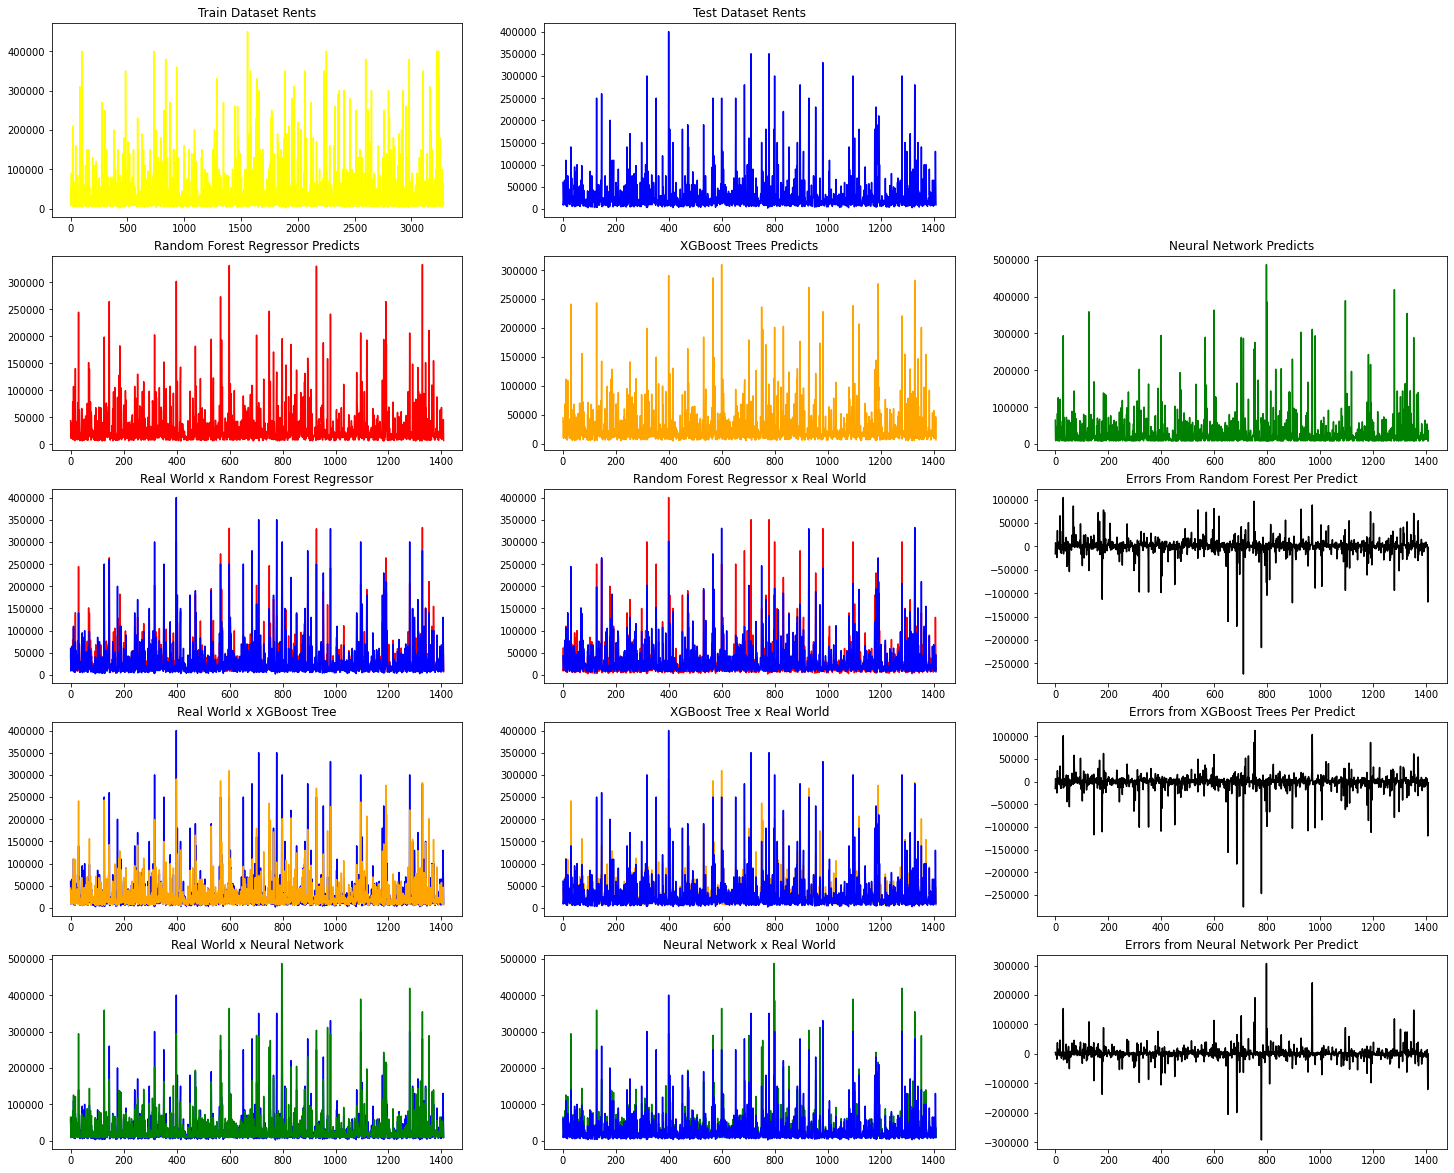

In [53]:
plt.figure(figsize=(25, 25))

plt.subplot(6, 3, 1)
plt.title('Train Dataset Rents')
plt.plot(y, color='yellow')

plt.subplot(6, 3, 2)
plt.title('Test Dataset Rents')
plt.plot(y_test, color='blue')

plt.subplot(6, 3, 4)
plt.title('Random Forest Regressor Predicts')
plt.plot(random_forest_predict, color='red')

plt.subplot(6, 3, 5)
plt.title('XGBoost Trees Predicts')
plt.plot(xgboost_predict, color='orange')

plt.subplot(6, 3, 6)
plt.title('Neural Network Predicts')
plt.plot(nn_predict, color='green')

plt.subplot(6, 3, 7)
plt.title('Real World x Random Forest Regressor')
plt.plot(random_forest_predict, color='red')
plt.plot(y_test, color='blue')

plt.subplot(6, 3, 8)
plt.title('Random Forest Regressor x Real World')
plt.plot(y_test, color='red')
plt.plot(random_forest_predict, color='blue')

plt.subplot(6, 3, 9)
plt.title('Errors From Random Forest Per Predict')
plt.plot(random_forest_predict-y_test, color='black')

plt.subplot(6, 3, 10)
plt.title('Real World x XGBoost Tree')
plt.plot(y_test, color='blue')
plt.plot(xgboost_predict, color='orange')

plt.subplot(6, 3, 11)
plt.title('XGBoost Tree x Real World')
plt.plot(xgboost_predict, color='orange')
plt.plot(y_test, color='blue')

plt.subplot(6, 3, 12)
plt.title('Errors from XGBoost Trees Per Predict')
plt.plot(xgboost_predict-y_test, color='black')

plt.subplot(6, 3, 13)
plt.title('Real World x Neural Network')
plt.plot(y_test, color='blue')
plt.plot(nn_predict, color='green')

plt.subplot(6, 3, 14)
plt.title('Neural Network x Real World')
plt.plot(nn_predict, color='green')
plt.plot(y_test, color='blue')

plt.subplot(6, 3, 15)
plt.title('Errors from Neural Network Per Predict')
plt.plot(nn_predict-y_test, color='black')